# Manipulating Time Series Data in Python

## Table of Contents

- [Introduction](#intro)
- [Working with Time Series in Pandas](#s1)
    - [Indexing & resampling time series](#s2)
    - [Lags, changes, and returns for stock price series](s#3)
- [Basic Time Series Metrics & Resampling](s#4)
    - Compare the performance of several asset classes
    - Comparing stock prices with a benchmark
    - Plot performance difference vs benchmark index
    - Changing the time series frequency: resampling
    - Convert monthly to weekly data

---
<a id='intro'></a>

## Introduction

In this course you'll learn the basics of manipulating time series data. Time series data are data that are indexed by a sequence of dates or times. You'll learn how to use methods built into Pandas to work with this index. You'll also learn how resample time series to change the frequency. This course will also show you how to calculate rolling and cumulative values for times series.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

path = "data/dc27/"

---
<a id='s1'></a>

## Working with Time Series in Pandas

<img src="images/ts2_001.png" alt="" style="width: 400px;"/>

### Your first time series

Create a week of data, iterate over the result, and obtain the `dayofweek` and `weekday_name` for each date.

In [4]:
# Create the range of dates here
# Use pd.date_range to create seven dates starting from '2017-1-1' 
#  at (default) daily frequency. Use the arguments start and periods. 
#  Assign the result to seven_days.
seven_days = pd.date_range(start='2017-1-1', periods=7, freq='D')

seven_days

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07'],
              dtype='datetime64[ns]', freq='D')

In [11]:
# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


---
<a id='s2'></a>

## Indexing & resampling time series

In [35]:
df = pd.read_csv(path+'data.csv')#, index_col='date')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,date,ozone,pm25,co
0,1999-07-01,0.012024,20.000000,1.300686
1,1999-07-02,0.027699,23.900000,0.958194
2,1999-07-03,0.043969,36.700000,1.194444
3,1999-07-04,0.035162,39.000000,1.081548
4,1999-07-05,0.038359,28.171429,0.939583


In [36]:
data = df
# Inspect data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
date     6317 non-null object
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None


In [37]:
# Convert the date column to datetime64
pd.to_datetime(data.date)
data.head()

,date,ozone,pm25,co
0,1999-07-01,0.012024,20.000000,1.300686
1,1999-07-02,0.027699,23.900000,0.958194
2,1999-07-03,0.043969,36.700000,1.194444
3,1999-07-04,0.035162,39.000000,1.081548
4,1999-07-05,0.038359,28.171429,0.939583


In [38]:
# Inspect data 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
date     6317 non-null object
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None


In [39]:
# Set date column as index
data.set_index('date', inplace=True)
# Inspect data 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3)
memory usage: 197.4+ KB
None


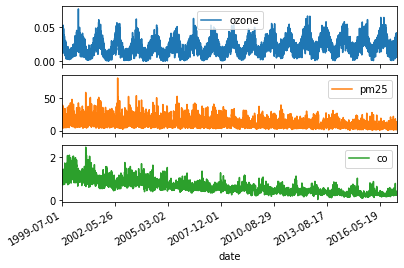

In [40]:
# Plot data
data.plot(subplots=True)
plt.show();

## Compare annual stock price trends

In the video, you have seen how to select sub-periods from a time series.

You'll use this to compare the performance for three years of Yahoo stock prices.

In [51]:
df = pd.read_csv(path+'yahoo.csv', parse_dates=True, index_col='date')
#df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


In [53]:
yahoo = df
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

prices.head()

,2013,2014,2015
0,20.08,NaN,NaN
1,19.78,39.59,50.17
2,19.86,40.12,49.13
3,19.40,39.93,49.21
4,19.66,40.92,48.59


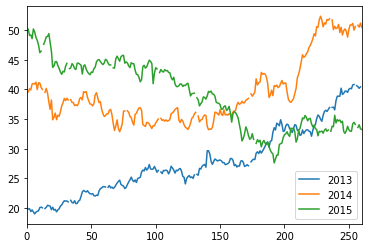

In [54]:
# Plot prices
prices.plot()
plt.show();

## Set and change time series frequency

Use data on the daily carbon monoxide concentration in NYC, LA and Chicago from 2005-17.

You'll set the frequency to calendar daily and then resample to monthly frequency, and visualize both series to see how the different frequencies affect the data.

In [55]:
df = pd.read_csv(path+'co.csv', parse_dates=True, index_col='date')
#df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176
2005-01-06,0.572917,0.792596,0.815761


In [57]:
co = df
# Inspect data
print(co.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
Chicago        1898 non-null float64
Los Angeles    1898 non-null float64
New York       1898 non-null float64
dtypes: float64(3)
memory usage: 59.3 KB
None


In [58]:
# Set the frequency to calendar daily
co = co.asfreq('D')

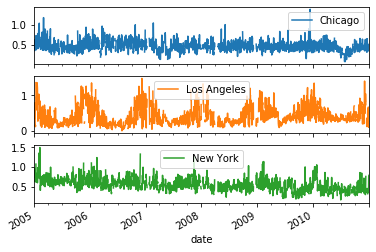

In [59]:
# Plot the data
co.plot(subplots=True)
plt.show();

In [60]:
# Set frequency to monthly
co = co.asfreq('M')

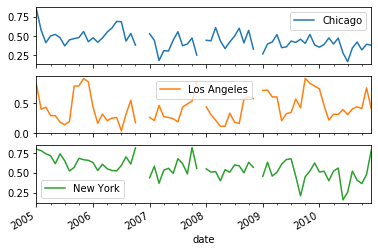

In [61]:
# Plot the data
co.plot(subplots=True)
plt.show();

---
<a id='s3'></a>

## Lags, changes, and returns for stock price series

## Shifting stock prices across time

The first method to manipulate time series is `.shift()`, which allows you shift all values in a Series or DataFrame by a number of periods to a different time along the DateTimeIndex.

Let's use this to visually compare a stock price series for Google shifted 90 business days into both past and future.

In [66]:
# Import data here
google = pd.read_csv(path+'google.csv', parse_dates=['Date'], index_col='Date')
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [67]:
# Set data frequency to business daily
google = google.asfreq('B')

In [68]:
# Create 'lagged' and 'shifted'
# Add new columns lagged and shifted to google that contain the Close 
#  shifted by 90 business days into past and future, respectively.
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)
google.head(10)

,Close,lagged,shifted
Date,,,
2014-01-02,556.00,511.00,NaN
2014-01-03,551.95,518.73,NaN
2014-01-06,558.10,529.92,NaN
2014-01-07,568.86,533.09,NaN
2014-01-08,570.04,526.65,NaN
2014-01-09,564.55,519.98,NaN
2014-01-10,564.52,520.63,NaN
2014-01-13,560.93,528.86,NaN
2014-01-14,574.13,529.77,NaN


In [70]:
google.tail(10)

,Close,lagged,shifted
Date,,,
2016-12-19,794.20,NaN,782.44
2016-12-20,796.42,NaN,777.14
2016-12-21,794.56,NaN,779.91
2016-12-22,791.26,NaN,777.50
2016-12-23,789.91,NaN,775.42
2016-12-26,NaN,NaN,772.15
2016-12-27,791.55,NaN,772.08
2016-12-28,785.05,NaN,769.64
2016-12-29,782.79,NaN,769.41


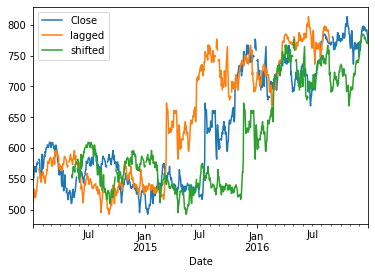

In [69]:
# Plot the google price series
google.plot()
plt.show();

## Calculating stock price changes

Calculate **returns** using current and shifted prices as input. Now you'll practice a similar calculation to 

In [75]:
# Return Floating division of series and other, element-wise (binary operator truediv)
# xt / xt-1
google['change'] = google.Close.div(google.shifted)
# Return Subtraction of series and other, element-wise (binary operator sub).
# Return Multiplication of series and other, element-wise (binary operator mul).
google['return'] = google.change.sub(1).mul(100)
google.tail(10)

,Close,lagged,shifted,change,return
Date,,,,,
2016-12-19,794.20,NaN,782.44,1.015030,1.502991
2016-12-20,796.42,NaN,777.14,1.024809,2.480891
2016-12-21,794.56,NaN,779.91,1.018784,1.878422
2016-12-22,791.26,NaN,777.50,1.017698,1.769775
2016-12-23,789.91,NaN,775.42,1.018687,1.868665
2016-12-26,NaN,NaN,772.15,NaN,NaN
2016-12-27,791.55,NaN,772.08,1.025218,2.521759
2016-12-28,785.05,NaN,769.64,1.020022,2.002235
2016-12-29,782.79,NaN,769.41,1.017390,1.738995


Calculate **absolute changes** from current and shifted prices, and compare the result to the function `.diff()`.

In [79]:
google['diff'] = google.Close.diff() # xt - xt-1
google.tail(10)

,Close,lagged,shifted,change,return,diff
Date,,,,,,
2016-12-19,794.20,NaN,782.44,1.015030,1.502991,3.40
2016-12-20,796.42,NaN,777.14,1.024809,2.480891,2.22
2016-12-21,794.56,NaN,779.91,1.018784,1.878422,-1.86
2016-12-22,791.26,NaN,777.50,1.017698,1.769775,-3.30
2016-12-23,789.91,NaN,775.42,1.018687,1.868665,-1.35
2016-12-26,NaN,NaN,772.15,NaN,NaN,NaN
2016-12-27,791.55,NaN,772.08,1.025218,2.521759,NaN
2016-12-28,785.05,NaN,769.64,1.020022,2.002235,-6.50
2016-12-29,782.79,NaN,769.41,1.017390,1.738995,-2.26


In [80]:
df = pd.read_csv(path+'yahoo.csv', parse_dates=True, index_col='date')
#df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


In [81]:
yahoo = df
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(periods=30)
 
# Subtract shifted_30 from price
yahoo['change_30'] = yahoo['price'] - yahoo['shifted_30']
 
# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(periods=30)
 
# Inspect the last five rows of price
yahoo.tail()

,price,shifted_30,change_30,diff_30
date,,,,
2015-12-25,NaN,32.19,NaN,NaN
2015-12-28,33.60,32.94,0.66,0.66
2015-12-29,34.04,32.86,1.18,1.18
2015-12-30,33.37,32.98,0.39,0.39
2015-12-31,33.26,32.62,0.64,0.64


In [86]:
# Is there any difference between change_30 and diff_30 values?
# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())

0.0    703
dtype: int64


## Plotting multi-period returns

Let's use `.pct_change()` function to calculate returns for various calendar day periods, and plot the result to compare the different patterns. We'll be using Google stock prices from 2014-2016.

Create the columns 'daily_return', 'monthly_return', and 'annual_return' that contain the pct_change() of 'Close' for 1, 30 and 360 calendar days, respectively, and multiply each by 100.

In [88]:
# Create daily_return
google['daily_return'] = google.Close.pct_change(1).mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(360).mul(100)

google.tail()

,Close,lagged,shifted,change,return,diff,daily_return,monthly_return,annual_return
Date,,,,,,,,,
2016-12-26,NaN,NaN,772.15,NaN,NaN,NaN,0.000000,7.313064,24.644565
2016-12-27,791.55,NaN,772.08,1.025218,2.521759,NaN,0.207619,4.358660,19.790248
2016-12-28,785.05,NaN,769.64,1.020022,2.002235,-6.50,-0.821174,2.690718,19.026321
2016-12-29,782.79,NaN,769.41,1.017390,1.738995,-2.26,-0.287880,1.498904,19.245944
2016-12-30,771.82,NaN,769.54,1.002963,0.296281,-10.97,-1.401398,1.483157,17.454955


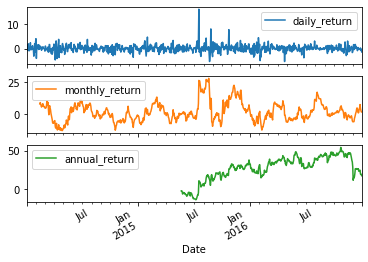

In [91]:
# Plot the result
google[['daily_return', 'monthly_return', 'annual_return']].plot(subplots=True)
plt.show();

---
<a id='s4'></a>

## Basic Time Series Metrics & Resampling

## Compare the performance of several asset classes

You can easily `compare several time series by normalizing their starting points to 100`, and plot the result. To broaden your perspective on financial markets, let's compare four key assets: stocks, bonds, gold, and oil.

In [93]:
# Import data here
# Import 'asset_classes.csv', using .read_csv() to parse dates in the 'DATE' 
#  column and set this column as the index, then assign the result to prices.
prices = pd.read_csv(path+'asset_classes.csv', parse_dates=['DATE'], index_col='DATE')
prices.head()

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,1503.35,402.15,648.50,70.47
2007-07-02,1519.43,402.96,650.50,71.11
2007-07-03,1524.87,402.02,657.25,71.41
2007-07-05,1525.40,400.15,655.90,71.81
2007-07-06,1530.44,399.31,647.75,72.80


In [94]:
# Inspect prices here
print(prices.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
SP500    2469 non-null float64
Bonds    2469 non-null float64
Gold     2469 non-null float64
Oil      2469 non-null float64
dtypes: float64(4)
memory usage: 96.4 KB
None


In [95]:
# Select first prices
# Select the first price for each series using .iloc[0] on prices 
#  and assign the result to first_prices.
first_prices = prices.iloc[0]
first_prices

SP500    1503.35
Bonds     402.15
Gold      648.50
Oil        70.47
Name: 2007-06-29 00:00:00, dtype: float64

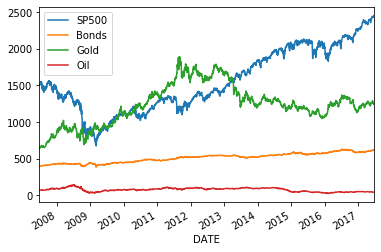

In [97]:
prices.plot()
plt.show();

In [98]:
# Create normalized
# Divide prices by first_prices, multiply by 100 
#  and assign the result to normalized.
normalized = prices.div(first_prices).mul(100)
normalized.head()

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,100.000000,100.000000,100.000000,100.000000
2007-07-02,101.069611,100.201417,100.308404,100.908188
2007-07-03,101.431470,99.967674,101.349268,101.333901
2007-07-05,101.466724,99.502673,101.141095,101.901518
2007-07-06,101.801976,99.293796,99.884348,103.306372


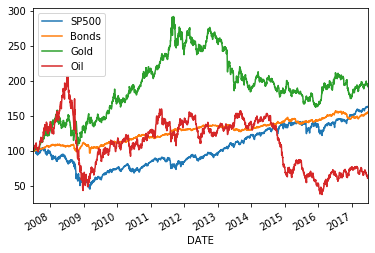

In [99]:
# Plot normalized
normalized.plot()
plt.show();

## Comparing stock prices with a benchmark

Compare the performance of various stocks against a benchmark. Learn more about the stock market by comparing the three largest stocks on the NYSE to the Dow Jones Industrial Average, which contains the 30 largest US companies.

The three largest companies on the NYSE are:

Company (Stock Ticker):
- Johnson & Johnson (JNJ)
- Exxon Mobil (XOM)
- JP Morgan Chase (JPM)

In [100]:
# Import stock prices and index here
stocks = pd.read_csv(path+'nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv(path+'dow_jones.csv', parse_dates=['date'], index_col='date')

In [101]:
stocks.head()

,JNJ,JPM,XOM
date,,,
2010-01-04,64.68,42.85,69.15
2010-01-05,63.93,43.68,69.42
2010-01-06,64.45,43.92,70.02
2010-01-07,63.99,44.79,69.80
2010-01-08,64.21,44.68,69.52


In [102]:
dow_jones.head()

,DJIA
date,
2010-01-04,10583.96
2010-01-05,10572.02
2010-01-06,10573.68
2010-01-07,10606.86
2010-01-08,10618.19


In [103]:
# Concatenate data and inspect result here
# Use pd.concat() along axis=1 to combine stocks and dow_jones 
#  and assign the result to data. Inspect the .info() of data.
data = pd.concat([stocks, dow_jones], axis=1)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
JNJ     1762 non-null float64
JPM     1762 non-null float64
XOM     1762 non-null float64
DJIA    1762 non-null float64
dtypes: float64(4)
memory usage: 68.8 KB
None


,JNJ,JPM,XOM,DJIA
date,,,,
2010-01-04,64.68,42.85,69.15,10583.96
2010-01-05,63.93,43.68,69.42,10572.02
2010-01-06,64.45,43.92,70.02,10573.68
2010-01-07,63.99,44.79,69.80,10606.86
2010-01-08,64.21,44.68,69.52,10618.19


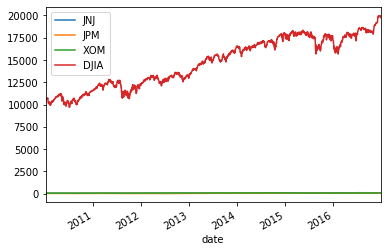

In [104]:
data.plot()
plt.show();

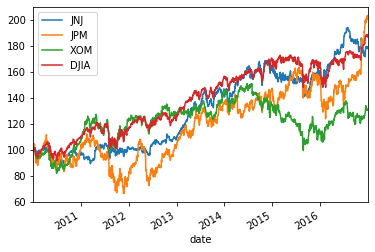

In [105]:
# Normalize and plot your data here
data.div(data.iloc[0]).mul(100).plot()
plt.show();

## Plot performance difference vs benchmark index

Calculate and plot the **performance difference** of a stock in percentage points relative to a benchmark index. Let's compare the performance of Microsoft (MSFT) and Apple (AAPL) to the S&P 500 over the last 10 years.

In [106]:
# Import stock data here
stocks = pd.read_csv(path+'msft_aapl.csv', parse_dates=['date'], index_col='date')
stocks.head()

,AAPL,MSFT
date,,
2007-01-03,11.97,29.86
2007-01-04,12.24,29.81
2007-01-05,12.15,29.64
2007-01-08,12.21,29.93
2007-01-09,13.22,29.96


In [107]:
# Import index here
sp500 = pd.read_csv(path+'sp500.csv', parse_dates=['date'], index_col='date')
sp500.head()

,SP500
date,
2007-06-29,1503.35
2007-07-02,1519.43
2007-07-03,1524.87
2007-07-05,1525.40
2007-07-06,1530.44


In [108]:
# Concatenate stocks and index here
# Use pd.concat() to concatenate stocks and sp500 along axis=1, 
#  apply .dropna() to drop all missing values, and assign the result to data.
data = pd.concat([stocks, sp500], axis=1).dropna()
data.head()

,AAPL,MSFT,SP500
date,,,
2007-06-29,17.43,29.47,1503.35
2007-07-02,17.32,29.74,1519.43
2007-07-03,18.17,30.02,1524.87
2007-07-05,18.96,29.99,1525.40
2007-07-06,18.90,29.97,1530.44


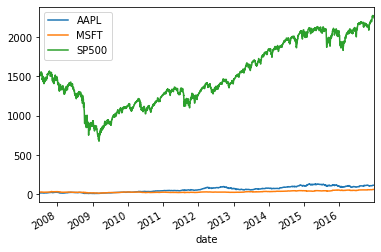

In [111]:
data.plot()
plt.show();

In [109]:
# Normalize data
normalized = data.div(data.iloc[0]).mul(100)
normalized.head()

,AAPL,MSFT,SP500
date,,,
2007-06-29,100.000000,100.000000,100.000000
2007-07-02,99.368904,100.916186,101.069611
2007-07-03,104.245554,101.866305,101.431470
2007-07-05,108.777969,101.764506,101.466724
2007-07-06,108.433735,101.696641,101.801976


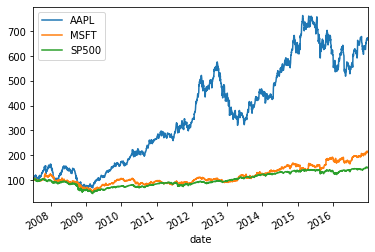

In [112]:
normalized.plot()
plt.show();

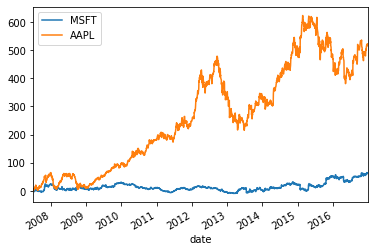

In [113]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Subtract the normalized index from the normalized stock prices, and plot the result
# Select tickers from normalized, and subtract normalized['SP500'] 
#  with keyword axis=0 to align the indexes, then plot the result.
normalized[tickers].sub(normalized['SP500'], axis=0).plot()
plt.show();

Now you can compare these stocks to the overall market so you can more easily spot trends and outliers.

## Convert monthly to weekly data

<img src="images/ts2_002.png" alt="" style="width: 400px;"/>

<img src="images/ts2_003.png" alt="" style="width: 400px;"/>

Use `.reindex()` to conform an existing time series to a DateTimeIndex at a different frequency.

Let's practice this method by creating monthly data and then converting this data to weekly frequency while applying various fill logic options.

In [114]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

In [118]:
# Create monthly_dates here
# Create monthly_dates using pd.date_range with start, 
#  end and frequency alias 'M'.
monthly_dates = pd.date_range(start=start, end=end, freq='M')
print(monthly_dates)

DatetimeIndex(['2016-01-31', '2016-02-29'], dtype='datetime64[ns]', freq='M')


In [117]:
# Create and print monthly here
# Create and print the pd.Series monthly, passing the list [1, 2] 
#  as the data argument, and using monthly_dates as index.
monthly = pd.Series(data=[1, 2], index=monthly_dates)
print(monthly)

2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64


In [119]:
# Create weekly_dates here
weekly_dates = pd.date_range(start=start, end=end, freq='W')
print(weekly_dates)

DatetimeIndex(['2016-01-03', '2016-01-10', '2016-01-17', '2016-01-24',
               '2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21',
               '2016-02-28'],
              dtype='datetime64[ns]', freq='W-SUN')


In [121]:
# Print monthly, reindexed using weekly_dates
# Apply .reindex() to monthly three times: first without additional options, 
#  then with ffill and then with bfill, print()-ing each result.
print(monthly.reindex(weekly_dates))

2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64


In [122]:
print(monthly.reindex(weekly_dates, method='bfill'))

2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64


In [123]:
print(monthly.reindex(weekly_dates, method='ffill'))

2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


In [12]:
---
<a id='s5'></a>

SyntaxError: invalid syntax (<ipython-input-12-345b3885c024>, line 1)

In [ ]:
<img src="images/ts2_001.png" alt="" style="width: 400px;"/>